<a href="https://colab.research.google.com/github/chadni00/CSE_303_Course/blob/main/Final_303_prjct_no_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [4]:
dataset = pd.read_csv('/content/RealEstate.csv') 
print(dataset)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [5]:
X_train, X_test, X2_train, X2_test, Y_train, Y_test= train_test_split(dataset.loc[:,'X3 distance to the nearest MRT station'],dataset.loc[:,'X4 number of convenience stores'],dataset.loc[:,'Y house price of unit area'], test_size = 0.25, random_state = 0)

In [6]:
X1 = np.array(X_train)
X2 = np.array(X2_train)
Y  = np.array(Y_train)
print(dataset) 

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [7]:
def Len(arr):

    sum = 0

    for i in arr:
        sum = sum + 1    
    return sum

In [8]:
def SUM(arr):

    sum = 0

    for i in arr:
        sum = sum + i
    return sum

In [9]:
def Mean(x):

  return  SUM(x)/Len(x)

In [10]:
def Find_abs(value):
  
  return (value**2)**(0.5)

In [11]:
def Find_var(arr):

  tot = 0
  avg_x = Mean(arr)

  for i in range(Len(arr)):
    tot = tot + math.pow(arr[i]-avg_x,2)
  find_var = tot/(Len(arr)-1)

  return find_var

In [12]:
def Find_cov(X,Y):

  Avg_x = Mean(X)
  Avg_y = Mean(Y)

  tot = 0

  for i in range(Len(X)):
    x1 = X[i]
    y1 = Y[i]
    tot = tot + (x1-Avg_x)*(y1-Avg_y)
  covvv = tot/(Len(X)-1)

  return covvv

In [13]:
def Find_b(X1,X2,Y):
  
  var = Find_var(X2)
  cov = Find_cov(X1,X2)
  
  b = Find_cov(X1,Y)*var -  Find_cov(X2,Y)*cov
  b = b/(Find_var(X1)*var   -  Find_cov(X1,X2)*cov)

  return b

In [14]:
def a_(X1,X2,Y):

  a = Mean(Y)
  b = Find_b(X1,X2,Y)*Mean(X1)
  c = Find_b(X2,X1,Y)*Mean(X2)

  return  a-b-c

In [15]:
def Predicted_Y(X1,X2,Y):

  Predicted_Y = []

  a = a_(X1,X2,Y)
  b = Find_b(X1,X2,Y)
  c = Find_b(X2,X1,Y)

  for i in range(Len(X1)):
    xx = X1[i]
    yy = X2[i]
    Predicted_Y.append(a+b*xx+c*yy)

  return np.array(Predicted_Y)

In [16]:
def Find_r2(X1,X2,Y):

  arr = Predicted_Y(X1,X2,Y)
  Avg = Mean(Y)

  Tot1 = 0
  Tot2 = 0

  for i in range(Len(Y)):
    xx = Y[i]
    Tot1 = Tot1 + math.pow(arr[i]-xx,2)
    Tot2 = Tot2 + math.pow(xx-Avg,2)

  return 1-(Tot1/Tot2)

In [17]:
def Find_mse(X1,X2,Y):
  
  arr = Predicted_Y(X1,X2,Y)
  Tot = 0

  for i in range(Len(Y)):
    xx = Y[i]
    Tot = Tot + math.pow(arr[i]-xx,2)
  mse = Tot/Len(Y)

  return mse

In [18]:
def Find_mae(X1,X2,Y):
  
  arr = Predicted_Y(X1,X2,Y)
  Sum = 0

  for i in range(Len(Y)):
    Sum = Sum + Find_abs(arr[i]-Y[i])
  mae = Sum/Len(Y)
  return mae

In [19]:
print('Mean Absolute Error = %.4f'%  Find_mae(X1,X2,Y))
print('Mean Squared Error = %.4f'%  Find_mse(X1,X2,Y))
print('R2 score = %.2f'%  Find_r2(X1,X2,Y))

Mean Absolute Error = 6.9963
Mean Squared Error = 96.0027
R2 score = 0.49


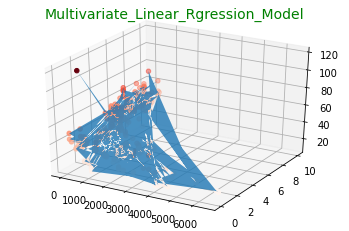

In [20]:
b_1 = Find_b(X1,X2,Y)
b_2 = Find_b(X2,X1,Y)
a = Mean(Y) - b_1*Mean(X1)-b_2*Mean(X2)

Equ = a+b_1*X1+b_2*X2
fig = plt.figure()

a_x = fig.add_subplot(111, projection='3d')
a_x.scatter3D(X1, X2, Y, c=Y, cmap='Reds');

vertices = [list(zip(X1,X2,Y))]

poly = Poly3DCollection(vertices, alpha=0.8)
a_x.add_collection3d(poly)


plt.title("Multivariate_Linear_Rgression_Model",fontsize=14,color="Green")
plt.show()